<a href="https://colab.research.google.com/github/MitchMaegaard/Algorithmic-Trading/blob/master/Algorithmic_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

### Stock Market

The *stock market* refers to the collection of markets and exchanges where regular activities of buying and selling stocks, which represent ownership claims in a company, take place. The U.S. stock market is comprised of multiple *exchanges*, including the New York Stock Exchange (NYSE), Nasdaq, BATS, and CBOE. Although other financial securities are also traded on these markets, the scope of this project focuses solely on stocks (equities).

### Building a Portfolio

Briefly, the purpose of trading on the stock market is to make a profit by taking partial ownership in financing one or more companies. This is accomplished by systematically deciding what companies to invest in, and when to "take your money and run". A logical investor purchases shares when they think the value will increase (going *long*), and sells shares when they think the value will decrease (*shorting*). Further, an investor can put together a *trading strategy* where they follow a fixed plan of longing and shorting equities. Any given strategy will work to build a *portfolio* consisting of one or more equities, which subsequently can be evaulated in terms both *risk* (probability of success on an investment) and *return* (cumulative gains/losses on investment); the goal in such a system is to maximize returns while minimizing risk, given the understanding that riskier assets have the potential to producing greater profits (and losses).

### Algorithmic Trading

As a leading stock exchange, the NYSE alone facilitates approximately 1.46 *million* trades per day from about 2,800 different companies, ranging from blue chips to new high-growth companies. Moreover, each company can be represented by a vast array of financial information, including daily *OHLC* market data (open-high-low-close) along with current trading prices, as well as over 900 fundamental indicators, which can give insight to a companies *liquidity* (ability to convert assets to cash), *leverage* (ability to pay long-term debt), and *valuation* (return on investment) properties. Considering all of the available information, an investor has access to over 2.5 million datapoints on the NYSE each day; for an individual looking to invest in the "right" company at the "right" time, these numbers can be extremely intimidating, and might even turn several away from investment. This is where the power of *algorithmic* trading comes in.  

Algorithmic trading is a broad term for a method that has the ability to harness every bit of this information at any given time, and automate the process of buying and selling stocks based on a pre-defined strategy to generate profits at a speed and frequency that is impossible for a human trader. Algorithmic methods can generally be broken down into *momentum investing* and *forecasting*.  

#### Momentum Investing

Momentum investing is a strategy that capitalizes on the continuance of an existing market trend, where the idea is to buy or hold securities that have shown high returns over a prior time interval, and sell or avoid those with poor returns over the same interval. Momentum investing can further be broken down into three method subcategories inlcuding (i) moving averages, (ii) cross-asset analysis, and (iii) technical indicators.  

*Moving averages* employ a simple strategy: select an equity and define short (e.g., 50-day) and long-term (e.g., 200-day) intervals, then compute a *rolling* average for each day, such that the averages will fluctuate slightly with price, though to a lesser extent than they would on a daily basis (because they are averaging for a longer period). Keeping in mind that this is a *momentum* strategy, we are looking for equities that are performing the best at this moment; therefore, it makes sense that a cross of the 50-day average over the 200-day average would signal a buy, and the opposite would signal a sell. Each time period can be modified and validated for improved performance and to better meet an investors' goals for different scenarios.  

*Cross-asset analysis* works similarly, in that trades are signaled by the crossing of "indicator" lines, but supplemental assets are pulled in from various sources for evaluation. For this method, 2 and 10-year *treasury yield curves* can be used, with longs signaled by the 10-year moving above the 2-year. In a "normal" market environment, long-term bonds offer higher rates to compensate for riskiness and inflation that is not included in a short-term bond; concisely, a diminishing gap or cross of the 2-year over 10-year signals a decline in economic growth, and the investor should exit the market.  

The third and final category of momentum investing employs *technical indicators*, which are also used to define thresholds at which equities should be traded. Common indicators utilized in trading algorithms include *relative strength index* (RSI), *moving average convergence-divergence* (MACD), *money flow index* (MFI), *stochastic oscillators*, and *Bollinger Bands*. Although the scope of this project does not cover every method, it focuses on a combination of MACD and stochastic osciallator in what is known as the *double cross* strategy. MACD utilizes an *exponential moving average*, which places greater weight on recent data points than a simple moving average. $$EMA_t = (Value_t*\frac{smoothing}{1+days}) + EMA_{t-1}*(1-\frac{smoothing}{1+days})$$ By itself, a MACD exceeding the 9-day EMA signals a buy condition. A stochastic oscialltor is extremely useful in a volatile market, and works by comparing current closing price to a range of prices over time, placing more emphasis on tracking the *speed* of change rather than the price. We define prices $C$ (current price), $H_{14}$ (14-day high), and $L_{14}$ (14-day low) to compute $\%K$ (the current or "slow" value of the stochastic oscillator). $$\%K = 100*(\frac{C-L_{14}}{H_{14} - L_{14}})$$ The "fast" value of the stochastic indicator, $\%D$, is the 3-period moving average of $\%K$. Buy signals for this indicator are $\%K < 20$ or $\%K > \%D$ (as long as both are $<80$). However, going long with the double-cross strategy strictly conditions that the stochastic must signal *prior* to the MACD signal, as long as the later indicator occurrs within 2 trading days. On the other hand, the investor should exit the position at the first sign of either indicator turning down.  

Although these strategies are not impelmented in this notebook, they were trialed in a separate coding environment called *QuantConnect*, the technicalities of which will be detailed later. It's clear to see that monitoring these strategies on a daily basis for several hundreds of stocks would require an immense amount of time, hence the need for algorithmic trading. On the other hand, specifically in terms of momentum investing, common downfalls include that the exact period of investment, or continued upward momentum, as well as an estimate of how *much* an asset price will increase, if at all, is largely unknown. The strategy has also received backlash from professional investment managers as a reliable method for long-term investing, due to the efficient market hypothesis. Investment duration is of concern to investors because of trading fees charged by brokers; short-term investments (less than 1-year) will accrue more fees, thus decreased returns, due to the frequency of buying and selling transactions, along with captial taxation. To combat these issues, investors turn to mean-reversion and forecasting for long-term strategies, the later of which is covered in the scope of this project.  

#### Forecasting

Example data points defined by an independent variable, $x_1$, and dependent variable, $Y$, are defined below.  

| $x_1$ | $Y$ |
|---------|-------------|
| 14.2 | 215 |
| 16.4 | 325 |
| 11.9 | 185 |
| 15.2 | 332 |
| 18.5 | 406 |


We could proceed to plot these points on a graph with both horizontal ($x_1$) and vertical ($Y$) axes. In elementary algebra, a common method for fitting a dependent variable based on some independent variable can be modeled by the regression equation $Y=mx_1+b$, where $m$ is the slope of the regression line and $b$ is some constant that adjusts where the line crosses the y-axis. Ideally, in this type of model we seek to minimize what's known as the adjusted $r^2$, calculated as follows. $$r^2 = \frac{SSR}{SSTO} = 1 - \frac{SSE}{SSTO}$$ The value of this function takes on a range of values 0 to 1, where values closer to 1 indicate that the independent variable (also known as the predictor variable) accounts for a greater amount of variation in the dependent variable. The benefit in creating a regression line provides us the potential to estimate future data points, either by *interpolation* ($x_1$ values within the current range) or *extrapolation* ($x_1$ values outside of the current range), such that if we are given some $x_1$ value that we have not yet collected before, the model will be able to effectively give an estimated value, $\hat{Y}$. The underlying idea of this principal extends to *forecasting*, in which a univariate model considers only a single predictor $x_1$ and *future* $x_1$ values become the $Y$ values.  

Forecasting relies on extracting historical patterns from *time series* data, and making future projections based on the relative position in history the data coincides with. Briefly, time series data is a sequence of data points collected in successive order. This is directly applicable to the stock market and investment decision making, as we have the ability to track prices and rates at defined intervals for specified durations of time; for example, logging the daily closing price of a security over several days will supply information to the user as to the day of record and the price on that specific day. Sample data points are shown in the table below.  

| Day | $x_1$ |
|--------|-------------|
| 1 | 215 |
| 2 | 325 |
| 3 | 185 |
| 4 | 332 |
| 5 | 406 |

Although the "time" factor used in the example only incrementally counts the number of observations from a starting point, this is commonly a more complex descriptor including year, day, hour, minute, etc. Time series models are significantly more useful when the data is *serially correlated*, or there exists some underlying relationship between an observation and a prior observation (called a *lag(n)* observation, where *n* corresponds to the look-back number of time-intervals). The scope of this project outlines the steps necessary to analyze time series stock market data for these and other types of relationships, extract key insights, and apply decisions to building a high-performing and low-risk porfolio; it does so by creating a comprehensive guide to the steps in time series modeling, the specific steps and details of which can be found below.  

### Market Simulation

Stock market *simulators* are platforms that allow users to access equity and financial data, ideally in real-time. They are set up such that a programmer can code a trading strategy, then test the strategy performance in a process known as *backtesting*, where starting capital is allocated to place trades on historical data that would have otherwise happened over a pre-defined time interval. This allows users to test various strategies and evaluate them with performance metrics, prior to implementing them in a live-trading scenario where the risk for loss is significantly increased.  

#### Backtesting

Common metrics utilized to evaluate strategy performance in comparison to benchmark indices include $\alpha$, $\beta$, and *sharpe ratio*. In the stock market, *benchmarks* are a predetermined security or set of securities used to compare a given strategy to a long-term buy-and-hold strategy, and are typically taken to be one of the S&P 500, Dow Jones Industrial Average (DJIA), or Nasdaq Composite Index, as these are constructed of a variety of companies on the market and are utilized by professionals to assess the state of the market as a whole. For example, the (inflation-adjusted) historical average annual return on the S&P 500 is around 6%, meaning an investor could expect to make around \\$6,000 in the first year on a \$100,000 initial investment. Therefore, the goal of a successful investment strategy should achieve higher than 6% annual returns. We can use the proposed evaluation metrics defined below to measure the performance of a portfolio built on an investment strategy, while also considering things such as the riskiness of our portfolio.  

 $$\alpha = \frac{Price_{end}+Distribution-Price_{start}}{Price_{start}}$$ $\alpha$ measures the excess return of an investment or portfolio relative to the return of a benchmark index, where higher values are preferred. An $\alpha$ value of 1.0 tells us that the portfolio outperformed a benchmark index by 1%, while a value of -1.0 means the portfolio underperformed by 1%.  

$$\beta = \frac{Cov(R_e, R_m)}{Var(Rm)}$$ $\beta$ accounts for the volitility of a security or portfolio in comparison to the entire market, where $R_e$ is the return on an individual stock, and $R_m$ is the return on the overall market.  Here, a value of 1.0 indicates that the portfolio has strong correlation with the market, so the investor is taking on no excess risk, but also no excess rewards. A $\beta$ greater than 1.0 shows increased volatility, and increases both the risk *and* return of a given portfolio.  

$$Sharpe = \frac{R_p-R_f}{\sigma_p}$$ *Sharpe ratio* measures the volatility in returns (a.k.a. the "risk-adjusted" returns), and is typically taken as a leading indicator because of it identifies not only that an investment is achieving return, but also *how* it is achieving return. We define $R_p$ as the return of a portfolio, $R_f$ as the risk-free rate, and $\sigma_p$ as the standard deviation of a portfolio's excess return.  Overall, a greater sharpe ratio represents a more attractive risk-adjusted return, with values greater than 1.0 being "acceptable", and values of 3.0 or higher being "excellent".  

#### Platforms

After exploring various simulators including NinjaTrader, Quantopian and Zipline Live, I ended up using [QuantConnect](https://www.quantconnect.com/) for a variety of reasons. Not only is the account setup free and easy, they also support programming in both C# and Python, as well as backtesting with complete performance metrics. Quantopian is similar in nature, but QuantConnect gains an edge by providing students with accredited email addresses free access to live trading (e.g., the ability to implement a strategy with real money and a brokerage account), with only small fees placed on individual trades.  

Getting started in QuantConnect is relatively straightforward. They have fantastic community support including access to [tutorials](https://www.quantconnect.com/tutorials/home/home), a live discussion forum, several example algorithms, and complete [documentation](https://www.quantconnect.com/docs/home/home). They also support both *research* and *laboratory* environments, where users can perform exploratory data analysis in a Jupyter notebook prior to migrating their strategy to a python script that connects with the backtesting platform. Additonally, *QuantQuote* provides tick data, down to minute resolution, for 29,000 symbols since January 1998, and *Morning Star* provides fundamentals and over 9,000 indicators for 8,000 symbols.  

### Why Google Colab?

I migrated coding and workflow to Google Colab, as QuantConnect only supported packages for basic data analysis and feature engineering, and made it difficult to import external data or perform web scraping. This wasn't an issue when implementing momentum investing strategies, but the platform struggled to support any types of forecasting packages. Additionally, basic algorithms would often take several minutes to initialize and backtest, as multiple customer scripts through the site were running simultaneously on a single server. Although this would not be an issue for deploying a final algorithm that would only be run once per month, it is not ideal for testing various implementations over a short period of time.  

Colaboratory is a Google project aimed at providing a collaborative programming environment, specifically for data science/machine learning education and research. It is a Jupyter notebook environment that runs in the cloud, and each session is equipped with a virtual machine running 13 GB of RAM with the option of a CPU, GPU (NVIDIA Tesla K80), or TPU processor. This makes it easier for users to utilize packages and dependencies, as they do not have to be installed locally. Addionally, work can be easily shared with other users; not only can the file be pushed directly to GitHub, but the notebook itself can actually be shared with other developers who can see output and modify cells in real-time.  

To toggle processing units, click on "Change runtime type" under the Runtime tab at the top of the notebook, and make a selection under "Hardware accelerator". By default the session runs on CPU ("None"), but alternative choices can be made accordingly.  

## Setup Research Environment

We need to bring in all of the "tools" necessary for data processing, data visualization, model building, and evaluation metrics. Google Colab runs virtually, meaning that when a session is set up, all users have access to the same exact environment. Some packages have additional dependencies on newer versions of other packages; therefore, to ensure consistency and replicability in future use and across platforms, we must make any necessary installations (to the virtual machine) prior to implementing them (to the notebook itself).

In [0]:
!pip3 install numpy --upgrade # needed for new pandas
# need 24. > for pmdarima
!pip3 install pandas --upgrade
!pip3 install statsmodels --upgrade
!pip install pmdarima # auto arima

In [0]:
import warnings

# data processing
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from math import sqrt
from datetime import datetime, timedelta
from random import random

# model building and evaluation
from statsmodels.tsa.stattools import adfuller, acf, pacf
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from scipy.optimize import brute
from pmdarima.arima import auto_arima

from sklearn import linear_model as lm

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics

# plotting
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
from fbprophet.plot import plot_cross_validation_metric

# web scraping
import bs4 as bs
import pickle
import requests

## Data and Error Definitions

Because the research envrionment has moved away from QuantConnect where security data was provided free of charge or effort, we must pull in historical data for securities manually. Although there are several sources available for users to subscribe and pay for API's to extract more current second-level market data, the easiest method I found suitable for data exploration and modeling was via Yahoo finance, which is incorporated into pandas `DataReader`. By specifying the symbol of a security we're interested, in addition to the desired start and end dates, we can harness daily OHLC (open, high, low, close) prices for the security, as well as trading volume and adjusted closing price (closing price that takes into account dividends, stock splits, etc.).  

Additionally, market capitalization can be calculated by multiplying the share price and the number of shares outstanding. This feature is added to create filters that can break stocks down into small (\\$300M to \$2B), mid (\$2B to \$10B), large (\$10B to \\$200B), and mega-cap (\$200B+) bins. For reference, smaller-cap stocks are typically more volatile and therefore riskier, but also present greater growth potential, than do larger-cap stocks. The ability to filter companies by this information is incredibly beneficial for individualizing investors' goals, and is utilized in limiting the total number of companies our forecasting methods will need to search through, thus minimizing overall computation time.  

All baseline analyses are performed on the S&P 500 index, which is constructed on the market capitalizations of 500 large American companies. Similar to the strategy implemented in momentum investing, this index is utilized not only for it's relative consistency in comparison to individual stocks because of the diversity, but also because it is often utilized to represent the performance of the market as a whole. The end goal will be to trial various forecating methods on the S&P, then extend the best performing model to the rest of the market.  

To ensure consistency and that no additional bias is introduced in modeling, pre-determined start and end dates are chosen as Oct. 31, 2015 and Sep. 1, 2018, respectively. Though somewhat arbitrary, the end date is set prior to downturn of the market in the final quarter of 2018 that carried into the beginning of 2019. Although the final model will need to consider these types of events, the reduced volatility is easier to build predictions on. Each date is also set such that an entire month is accounted for, in the event of correlation between stock prices on corresponding days of each month. Finally, the data collection period runs approximately two years, which should be sufficient for implementing cross-validated forecasting procedures.  

In momentum investing, algorithms are evaluated through backtesting where high values of *Sharpe ratio* are preferred. Because we are concerned about the *accuracy* of future predictions over the relative performance of the algorithm in comparison to some baseline, the approach for optimizing models and final model selection in forecasting is achieved somewhat differently. Instead, we primarily use *root mean square error* (RMSE) to compare our predictions ($\hat{Y}$) with actual future values ($Y$). $$RMSE = \sqrt{MSE(\hat{Y})} = \sqrt{E((\hat{Y}-Y)^2)} = \sqrt{\frac{\sum_{i=1}^{n}(\hat{Y}_i-Y_i)^2}{n}}$$ By calculation, RMSE monitors model performance over *n* future timesteps, and places a heavier weight on large errors to ensure that models are performing within a desired boundary of accuracy. Because the metric considers the difference between estimated and actual values, we interpret RMSE of 0 as having no error, and no upper-bound limit. For evaluation, we set $n=63$ future values to correspond with one quarter (approximately three months) of actual trading days (Monday through Friday). Models are build on historcial data known as the *training set*, and the prediction period is artifically simulated by creating a hold-out set, known as the *test set*. This is an important step such that we are not immediately throwing a model into production and having to evaluate performance in real-time.  

To ensure consistency, additional metrics to evaluate overall portfolio performance over the defined forecasting period are utilized. These consist of an *annualized Sharpe ratio*, computed by multiplying the Sharpe ratio by $\sqrt{252}$ (total trading days in one year) and considering a daily risk-free rate of 0, as well as *mean absolute percentage error* (MAPE) calculated as follows. $$MAPE = \frac{100\%}{n}\sum_{i=1}^n\mid\frac{Y_i-\hat{Y}_i}{Y_i}\mid$$ MAPE is a measure of prediction *accuracy* rather than error, making it easier to present and interpret to a broader audience. Intuitively, a value of 0 means that our model achieves 100\% accuracy in predicting prices for each of the 63 future trading days.

In [0]:
def load_stock(ticker, start_date, end_date):
  # read in data
  data = pdr.data.DataReader(ticker, start=start_date, end=end_date, data_source='yahoo')
  data['mktcap'] = data['Volume'] * data['Close']
  return data

In [0]:
def save_sp500_tickers(site='http://en.wikipedia.org/wiki/List_of_S%26P_500_companies'):
    resp = requests.get(site)
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.rstrip()
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

In [0]:
# make data definitions
ticker, start, end = 'SPY', '2015-10-31', '2018-9-1'
month, quarter, year = 21, 63, 252
stock_data = load_stock(ticker, start, end)['Close']
#stock_data.tail()

In [0]:
# compile all performance metrics
def percent_change(data):
  current, future = data[0], data[len(data)-1]
  return 100*(future-current)/current

def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true))*100

def sharpe_ratio(value):
  # greater values reflect a more attractive risk-adjusted return
  # (expected reuturns - risk free returns) / standard deviation -- assume "risk-free" rate to be 0 on a daily basis
  returns = np.diff(value) # don't worry about filling NAs
  sharpe = returns.mean() / returns.std()
  return sharpe * np.sqrt(year) # annualized ratio

def performance_stats(true, pred):
  return({"Actual Returns":percent_change(true), "Estimated Returns":percent_change(pred),
          "Projected Sharpe":sharpe_ratio(pred),
          "RMSE":np.sqrt(mean_squared_error(true, pred)), "MAPE":mean_absolute_percentage_error(true,pred)})

In [0]:
def ts_split(data, pred_period=quarter, print_sets=False):
  train_size = len(data) - pred_period
  train, test = data[:train_size], data[train_size:]
  
  if print_sets:
    print("Total daily observations: {}".format(len(data)))
    print("Train set: {num} ({first} to {last})".format(num=len(train), first=train.index[1].date(), last=train.index[-1].date()))
    print("Test set: {num} ({first} to {last})".format(num=len(test), first=test.index[1].date(), last=test.index[-1].date()))
  
  return train, test

## Visualize time series

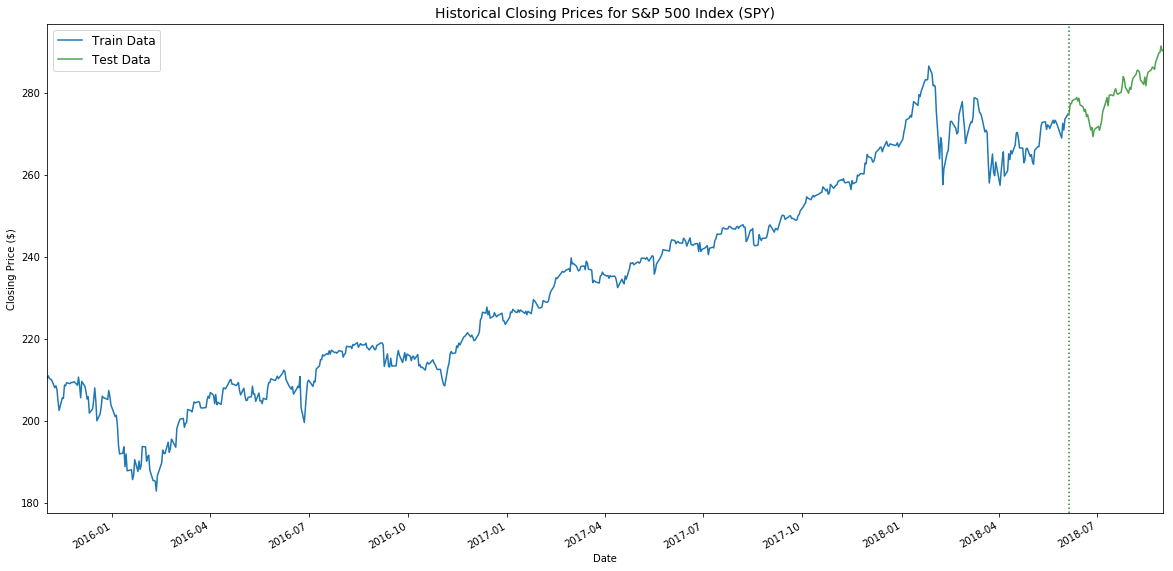

In [9]:
plt.figure(figsize=(20,10))
stock_data[:-quarter].plot(label="Train Data")
stock_data[-quarter:].plot(label="Test Data", color='forestgreen', alpha=0.8)
plt.axvline(x=stock_data.index[-quarter], linestyle=':', color='forestgreen')
plt.title("Historical Closing Prices for S&P 500 Index (SPY)", fontsize=14)
plt.ylabel("Closing Price ($)")
plt.legend(fontsize='large')
plt.show()

## Make Stationary



In [0]:
def stationary_test(data, window=7):
  # quick function where we can pass in data and get both a visual & stats test result on stationarity
  
  roll_avg = data.rolling(window=window, center=False).mean()
  roll_std = data.rolling(window=window, center=False).std()
  
  # plot data
  plt.figure(figsize=(20,10))
  orig = plt.plot(data, color='blue', label='Original', alpha=0.5)
  r_avg = plt.plot(roll_avg, color='red', label='Mean')
  r_std = plt.plot(roll_std, color='green', label='Std')
  plt.legend(loc='best', fontsize='large')
  plt.title('{}-day Rolling Mean & Standard Deviation'.format(window), fontsize=15)
  plt.show(block=False)
  
  # Dickey-Fuller test
  df_test = adfuller(data)
  df_out = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key, value in df_test[4].items():
    df_out['Critical Value ({k})'.format(k=key)] = value
  
  print("Results of Dickey-Fuller Test:\n{res}".format(res=df_out))

#### Original Data

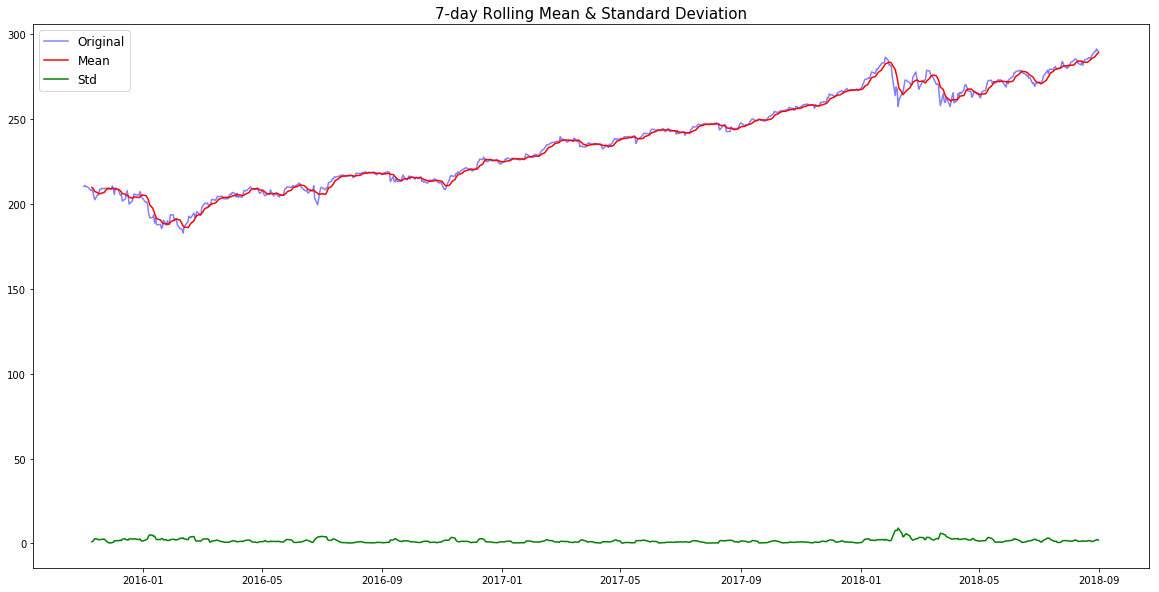

Results of Dickey-Fuller Test:
Test Statistic                   0.100718
p-value                          0.966110
#Lags Used                       3.000000
Number of Observations Used    710.000000
Critical Value (1%)             -3.439594
Critical Value (5%)             -2.865619
Critical Value (10%)            -2.568942
dtype: float64


In [11]:
stationary_test(stock_data)

#### Log-Transformed Data

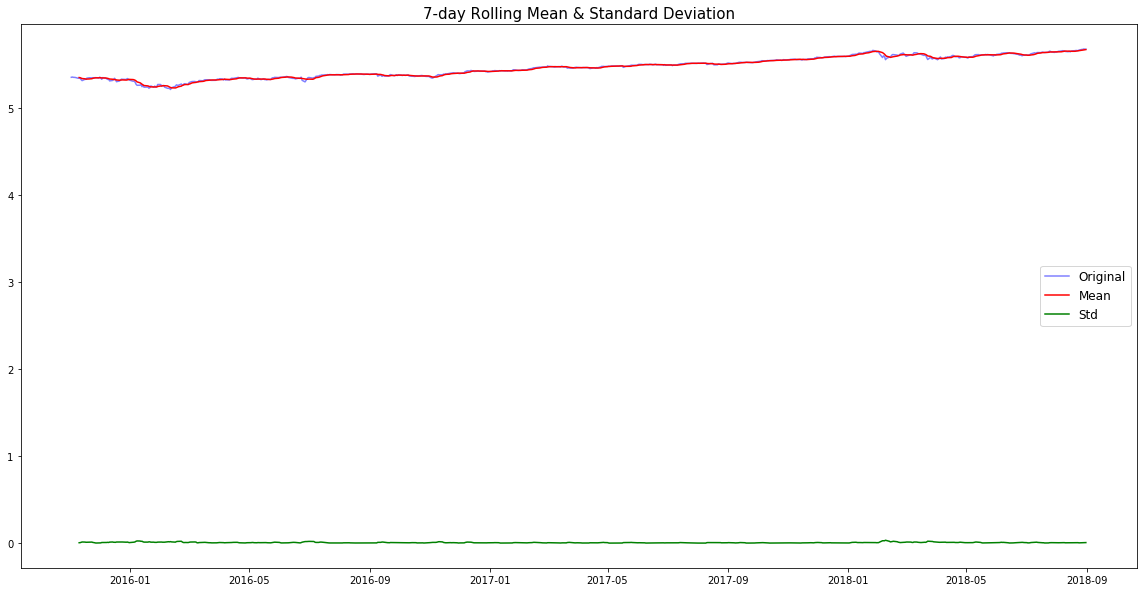

Results of Dickey-Fuller Test:
Test Statistic                  -0.046794
p-value                          0.954487
#Lags Used                       3.000000
Number of Observations Used    710.000000
Critical Value (1%)             -3.439594
Critical Value (5%)             -2.865619
Critical Value (10%)            -2.568942
dtype: float64


In [12]:
# stabilize variance
log_data = np.log(stock_data)
stationary_test(log_data)

#### Differenced Data

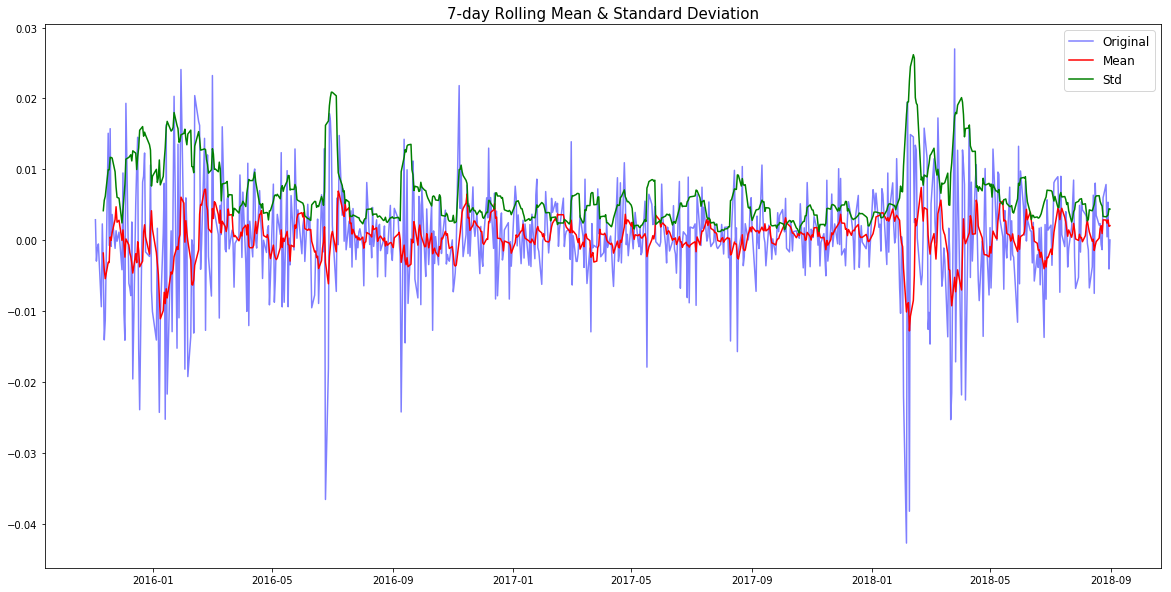

Results of Dickey-Fuller Test:
Test Statistic                -1.569228e+01
p-value                        1.428997e-28
#Lags Used                     2.000000e+00
Number of Observations Used    7.100000e+02
Critical Value (1%)           -3.439594e+00
Critical Value (5%)           -2.865619e+00
Critical Value (10%)          -2.568942e+00
dtype: float64


In [13]:
# stabilize mean
log_diff = np.log(stock_data).diff()
log_diff.dropna(inplace=True)
stationary_test(log_diff)

#### Reforming Data

In [0]:
def reform_data(data, transf):
  # transforms np.log(data).diff() back to it's original form
  first_val = [np.log(data[0])]
  restructured = np.concatenate((first_val, transf))
  return np.exp(restructured.cumsum())

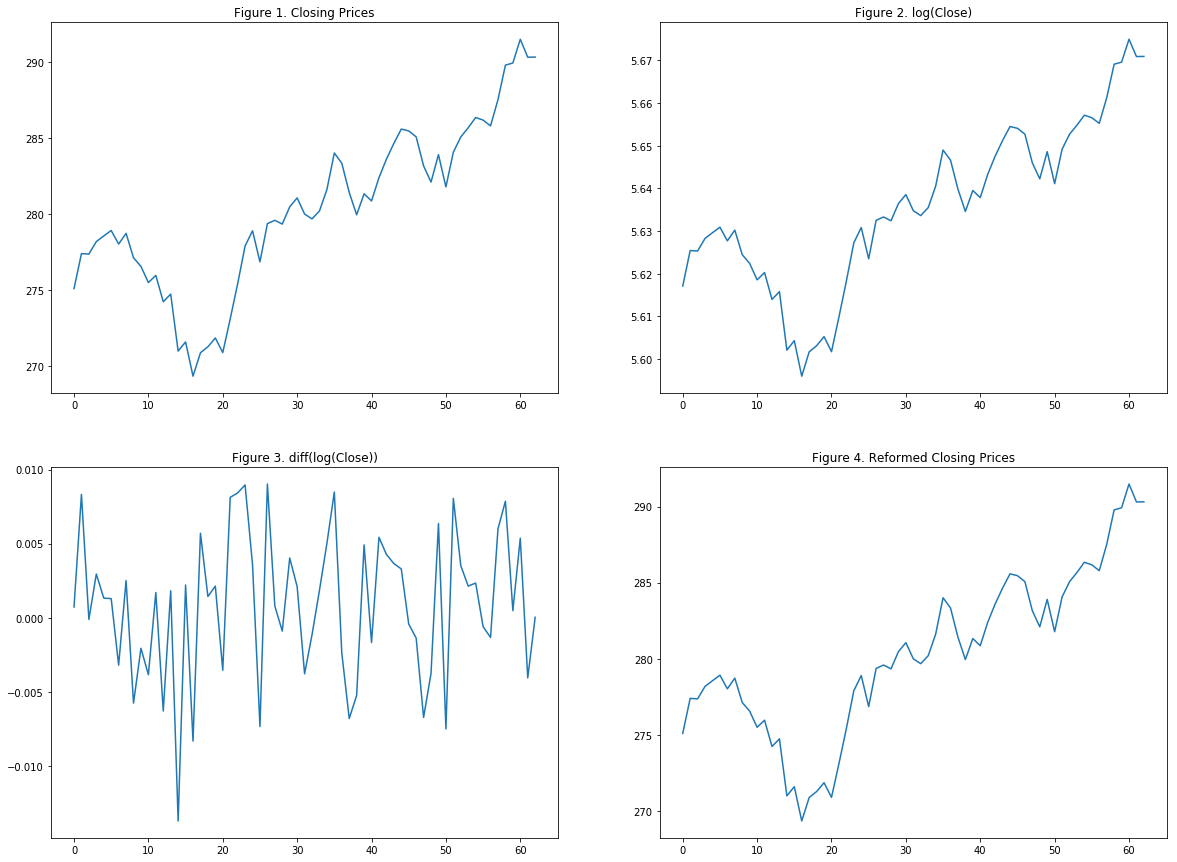

In [15]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(stock_data[-quarter:].values)
plt.title("Figure 1. Closing Prices")

plt.subplot(2,2,2)
plt.plot(log_data[-quarter:].values)
plt.title("Figure 2. log(Close)")

plt.subplot(2,2,3)
plt.plot(log_diff[-quarter:].values)
plt.title("Figure 3. diff(log(Close))")

plt.subplot(2,2,4)
plt.plot(reform_data(stock_data, log_diff)[-quarter:])
plt.title("Figure 4. Reformed Closing Prices")

plt.show()

## Autocorrelation

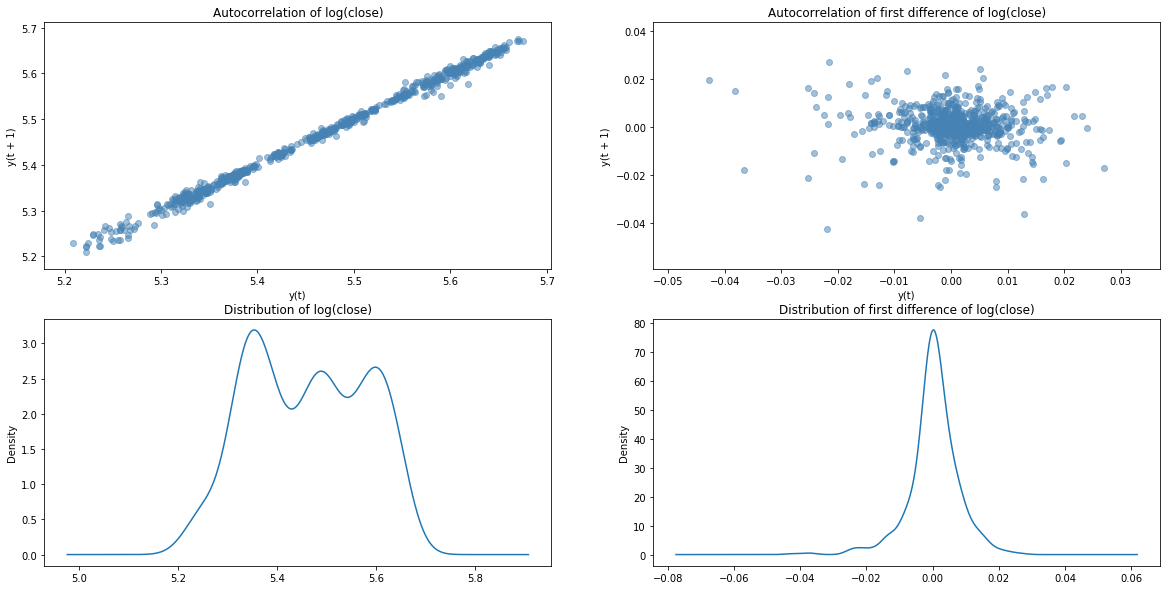

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1) # (numrows, numcols, fignum)
lag_plot(log_data, lag=1, c='steelblue', alpha=0.5)
plt.title("Autocorrelation of log(close)")

plt.subplot(2,2,2)
lag_plot(log_diff, lag=1, c='steelblue', alpha=0.5)
plt.title("Autocorrelation of first difference of log(close)")

plt.subplot(2,2,3)
log_data.plot(kind='kde')
plt.title("Distribution of log(close)")

plt.subplot(2,2,4)
log_diff.plot(kind='kde')
plt.title("Distribution of first difference of log(close)")

plt.show()

In [0]:
def plot_ap(data, num_lags=10):
  plt.figure(figsize=(20,10))
  plt.subplot(221)
  plot_acf(data, ax=plt.gca(), lags=num_lags)
  plt.subplot(222)
  plot_pacf(data, ax=plt.gca(), lags=num_lags)
  plt.show()

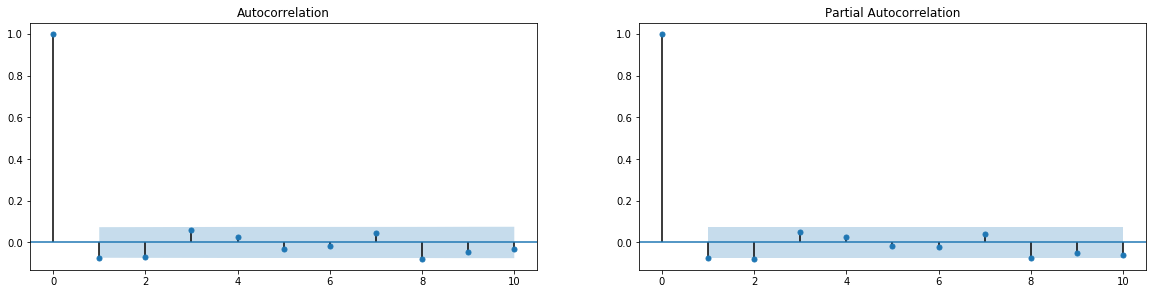

In [19]:
plot_ap(log_diff)

## Model Building

In [0]:
train, test = ts_split(log_diff)

### ARIMA

In [0]:
def optimize_arima(data, p_vals, d_val, q_vals):
  warnings.filterwarnings("ignore")
  low_bic, opt_order = np.inf, None
  for p in p_vals:
    for q in q_vals:
      order = (p, d_val, q)
      try:
        model = ARIMA(data, order).fit()
        bic = model.bic
        if bic < low_bic:
          low_bic, opt_order = bic, order
        # for logging: print("ARIMA{order}: {bic}".format(order=order, bic=bic))
      except: continue
  #print("Best ARIMA{order}: {bic}".format(order=opt_order, bic=round(low_bic, 4)))
  return opt_order

In [0]:
def arima_model(data, p, d, q, pred_period=91, persistence=True):
  train, test = ts_split(data, pred_period)
  
  order = optimize_arima(data, p, d, q)
  
  if order == (0,1,0):
    # random walk model
    hist, preds = train[-1], list()
    for i in range(len(test)):
      if persistence: preds.append(hist)
      # generate a small amount of random noise and add it to yesterday's closing value
      else: preds.append(hist + (-0.001 if random() < 0.5 else 0.001))
      hist = test[i]
  else:
    hist, preds = [x for x in train], list()
    for i in range(len(test)):
      mod = ARIMA(hist, order).fit(disp=0) # build model
      preds.append(mod.forecast()[0]) # predict 1 point into future
      hist.append(test[i]) # add values we look at to the train set
  
  true, pred = np.exp(test.values), np.exp(preds)
  stats = performance_stats(true, pred)
  
  plt.figure(figsize=(22,8))
  plt.plot(true, label="Acutal")
  plt.plot(pred, color="red", alpha=0.7, label="Predicted")
  plt.title("ARIMA{} Closing Prices".format(order), fontsize=15)
  plt.ylabel("Closing price ($)", fontsize=12)
  plt.xlabel("Days after last historical price", fontsize=12)
  plt.legend(fontsize='large')
  plt.show()
  
  for key, value in stats.items():
    print("{}: {:.4f}".format(key, value))
    
  return stats

#### Persistence

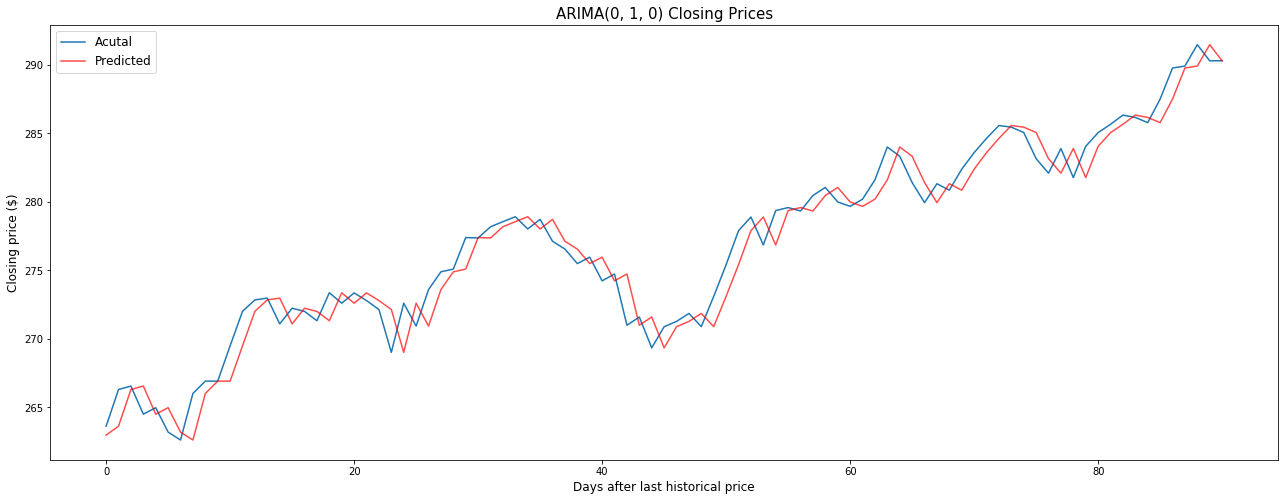

Actual Returns: 10.1202
Estimated Returns: 10.3886
Projected Sharpe: 3.2161
RMSE: 1.5204
MAPE: 0.4459


In [22]:
persistence = arima_model(log_data, range(0,3), 1, range(0,3))

#### Random Walk

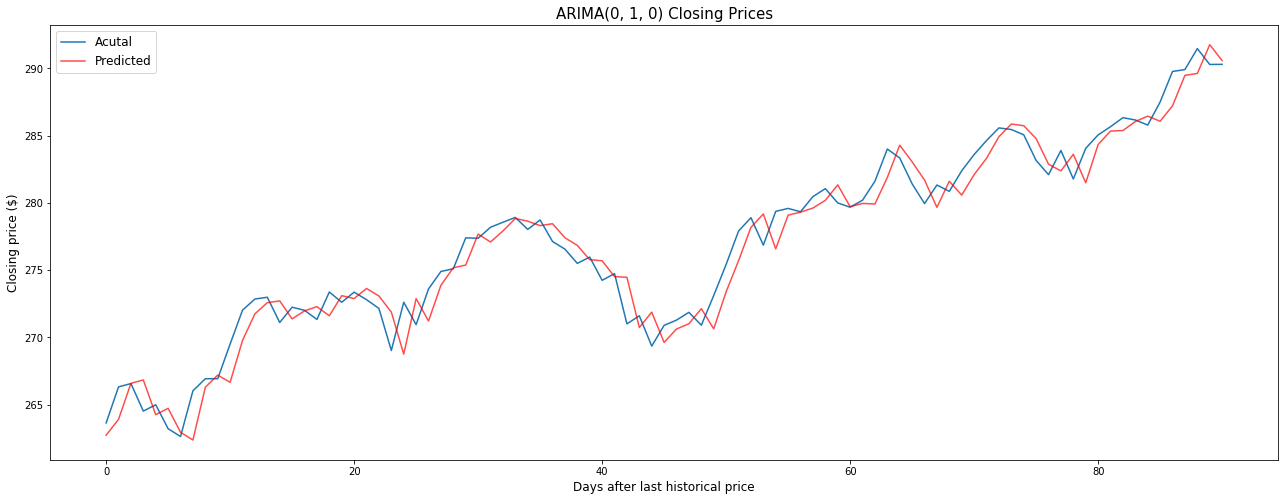

Actual Returns: 10.1202
Estimated Returns: 10.6096
Projected Sharpe: 3.1211
RMSE: 1.5285
MAPE: 0.4513


In [23]:
random_walk = arima_model(log_data, range(0,3), 1, range(0,3), persistence=False)

#### Auto-ARIMA

In [27]:
auto = auto_arima(train, start_p=1, start_q=1, test='adf', max_p=5, max_q=5, m=1, d=None, seasonal=False, start_P=0, D=0,
                 trace=False, error_action='ignore', suppress_warnings=True, stepwise=True)
print(auto.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  650
Model:                     ARMA(0, 3)   Log Likelihood                2243.581
Method:                       css-mle   S.D. of innovations              0.008
Date:                Mon, 20 May 2019   AIC                          -4477.163
Time:                        19:27:57   BIC                          -4454.778
Sample:                             0   HQIC                         -4468.480
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.488      0.137      -0.000       0.001
ma.L1.y       -0.0807      0.039     -2.061      0.040      -0.157      -0.004
ma.L2.y       -0.0741      0.039     -1.910      0.0

#### Diagnostics

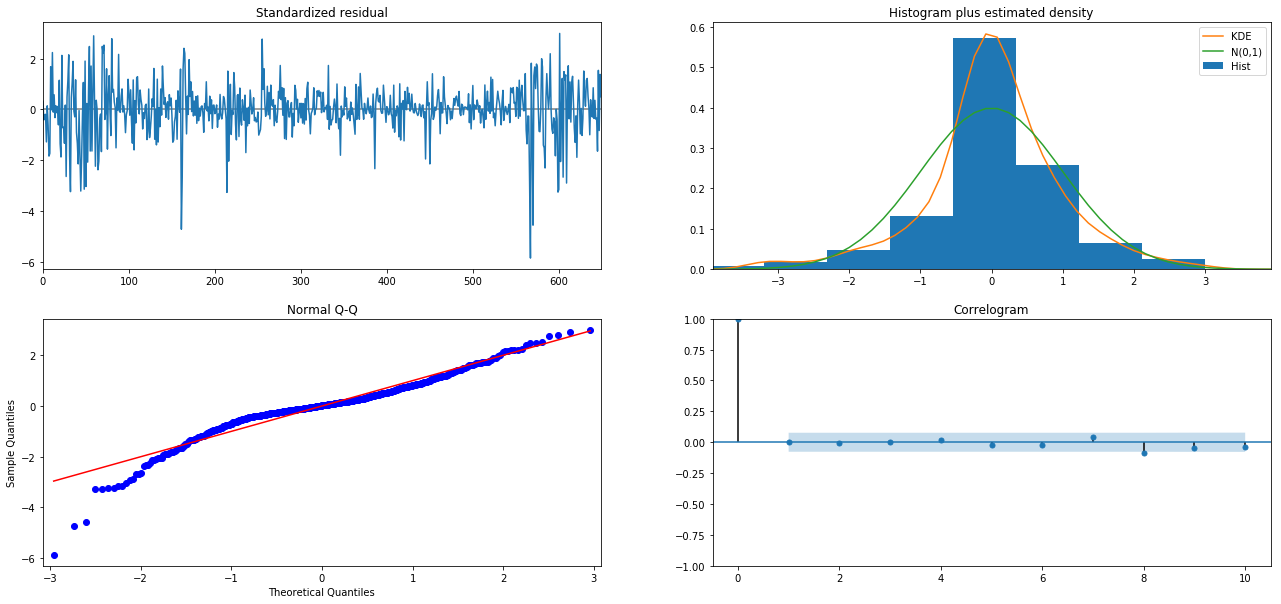

In [28]:
auto.plot_diagnostics(figsize=(22,10))
plt.show()

### Facebook Prophet

#### Fast Fourier Transformation (FFT)

In [0]:
def plot_fft(data, original_data, smooth_v1=0, smooth_v2=4, opt_fourier=2):
  fft = np.fft.fft(data) # fast fourier transform of signal
  psd = np.abs(fft)**2 # power spectral density of fourier transform
  fftfreq = np.fft.fftfreq(len(psd)) # get frequencies corresponding to the values of the psd
  pos = fftfreq > 0 # only interested in positive frequencies -- mirror image if we keep the whole thing
  
  # find top fundamental frequencies
  top_psd = (-psd[pos]).argsort()[:10] # idx=0 is maximal, 1 is 2nd highest, etc.
  smooth1 = top_psd[smooth_v1] + 1 # choose the value we want to use as our approximation -- add 1 to get correct index
  smooth2 = top_psd[smooth_v2] + 1
  
  fft1, fft2, fft3 = fft.copy(), fft.copy(), fft.copy()
  fft1[np.abs(fftfreq) > fftfreq[smooth1]] = 0 # cut freuencies higher than the fundamental frequency
  fft2[np.abs(fftfreq) > fftfreq[smooth2]] = 0
  fft3[np.abs(fftfreq) > fftfreq[opt_fourier]] = 0 # hard-code the results from Prophet for comparison
  
  slow1 = np.real(np.fft.ifft(fft1)) # inverse FFT to convert the modified fourier transform back to temporal domain
  slow2 = np.real(np.fft.ifft(fft2))
  slow3 = np.real(np.fft.ifft(fft3))
  
  reformed = reform_data(original_data, data)
  slow_ref1, slow_ref2, slow_ref3 = reform_data(original_data, slow1), reform_data(original_data, slow2), reform_data(original_data, slow3)
  
  # plot results
  plt.figure(figsize=(22,12))
  plt.subplot(2,1,1)
  plt.plot(fftfreq[pos], psd[pos])
  plt.axvline(x=fftfreq[smooth1], color='salmon', linestyle=':', label="Peak Fundamental Frequency ({})".format(smooth1))
  plt.axvline(x=fftfreq[smooth2], color='green', linestyle=':', label="Fundamental Frequency ({})".format(smooth2))
  plt.axvline(x=fftfreq[opt_fourier], color='violet', linestyle=':', label="Fundamental Frequency ({})".format(opt_fourier))
  plt.xlabel("Frequency [Hz]")
  plt.ylabel("Power Spectral Density")
  plt.title("Power Spectral Density as a function of frequency")
  plt.legend(fontsize='large')
  
  plt.subplot(2,1,2)
  plt.plot(reformed, label="Original Signal", lw=1.5)
  plt.plot(slow_ref1, label="FFT ({}) Approx.".format(smooth1), color='salmon')
  plt.plot(slow_ref2, label="FFT ({}) Approx.".format(smooth2), color='green', alpha=0.8)
  plt.plot(slow_ref3, label="FFT ({}) Approx.".format(opt_fourier), color='violet', alpha=0.8)
  plt.xlabel("Trading Day")
  plt.ylabel("Closing Price")
  plt.title("Original Signal Approximated by Fast Fourier Transforms")
  plt.legend(fontsize='large')
  plt.show()
  
  stats1, stats2, stats3 = performance_stats(reformed, slow_ref1), performance_stats(reformed, slow_ref2), performance_stats(reformed, slow_ref3)
  
  for idx, stat in zip((smooth1, smooth2, opt_fourier), (stats1, stats2, stats3)):
    print("\nFFT ({})".format(idx))
    for key in ["Projected Sharpe", "RMSE"]:
      print("{}: {:.4f}".format(key, stat.get(key)))

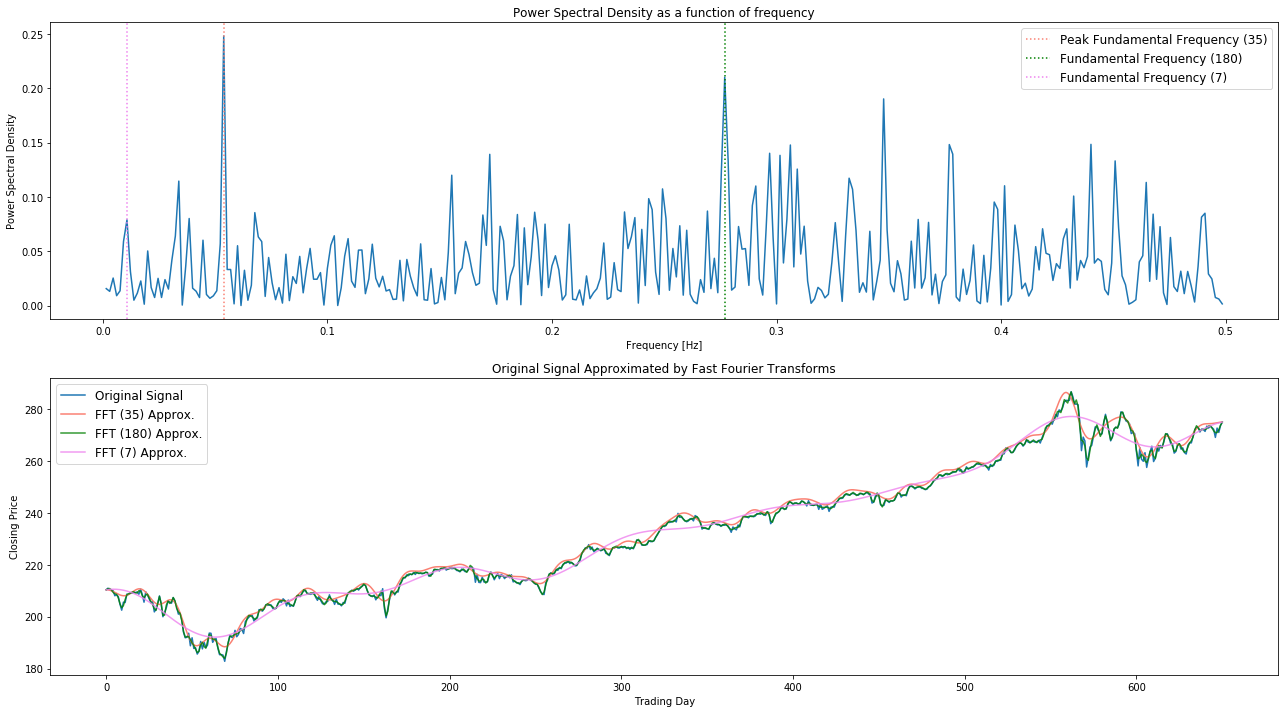


FFT (35)
Projected Sharpe: 2.8167
RMSE: 2.1236

FFT (180)
Projected Sharpe: 1.2394
RMSE: 0.7108

FFT (7)
Projected Sharpe: 6.9123
RMSE: 3.1945


In [35]:
plot_fft(log_diff[:-quarter], stock_data, smooth_v1=0, smooth_v2=1, opt_fourier=7)

#### Hyperparameter Optimization

In [0]:
def pf_analysis(data, period, f_order=8, pred_period=128, mode='additive', tune=True, plot_forecast=False, print_res=False):
  # period/fourier analysis
  split_date = str( (max(data.index) - timedelta(days=pred_period)).date() )
  
  # split data into train/test
  train, test = data[:split_date].iloc[:-1,], data[split_date:]
  
  # prediction period is the duration from our split date to the end of our timeseries
  pred_per = len(pd.date_range(split_date, max(data.index)))
  
  # convert training set to a workable format for `Prophet`
  df = train.reset_index()
  df.columns = ['ds','y']
  
  # fit Prophet model
  if tune:
    m = Prophet(interval_width=0.95, daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)
    m.add_seasonality('self_defined_seasonality', period=period, fourier_order=f_order, mode=mode)
    #m.add_seasonality('week', period=5, fourier_order=2, mode=mode)
    #m.add_seasonality('month', period=21, fourier_order=7, mode=mode)
    #m.add_seasonality('quarter', period=63, fourier_order=31, mode=mode)
    #m.add_seasonality('semi_annual', period=126, fourier_order=45, mode=mode)
  else: m = Prophet(interval_width=0.95, daily_seasonality=True)
  #m2 = m
  m.fit(df)
  #_rmse = fit_prophet(m2, df)
  #print("CV Result: {}".format(_rmse))
  
  # make predictions with Prohpet model
  future = m.make_future_dataframe(periods=pred_per)
  forecast = m.predict(future)
  
  # built-in plotting timeseries and forecast
  if plot_forecast:
    m.plot(forecast)
    plt.plot(test.index, test.values, '.', color='red', alpha=0.6)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title("Price predicitons with period of {period} days and fourier {fourier}".format(period=period, fourier=f_order))
    plt.show()
  
  model_tb = forecast['yhat'] # predictions
  model_tb.index = forecast['ds'].map(lambda x: x.strftime("%Y-%m-%d")) # corresponding date
  out_tb = pd.concat([test, model_tb], axis=1) # join actual values with predictions
  out_tb = out_tb[~out_tb.iloc[:,0].isnull()] # drop missing values
  out_tb = out_tb[~out_tb.iloc[:,1].isnull()]
  out_tb = np.exp(out_tb)
  
  if plot_forecast:
    plt.figure(figsize=(22,8))
    out_tb["Close"].plot(label="Actual")
    out_tb["yhat"].plot(color="red", label="Predicted")
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.title("Prophet model with period of {} days and fourier {}".format(period, f_order))
    plt.legend(fontsize='large')
    plt.show()
  
  stats = performance_stats(out_tb.iloc[:,0], out_tb.iloc[:,1])
  
  if print_res:
    for key, value in stats.items():
      print("{metric}: {stat:.4f}".format(metric=key, stat=value))
  
  return stats

In [0]:
def optimal_pf(data, pred_per=128, p_low=1, p_high=301, f_low=2, f_high=20):
  period_vals, fourier_vals = range(p_low, p_high), range(f_low, f_high)
  best_period, best_fourier, min_rmse = p_low, f_low, np.inf
  
  #print("Period\t|Fourier\t|RMSE")
  #print("===================================")
  for period in period_vals:
    for fourier in fourier_vals:
      _rmse = pf_analysis(data, period=period, f_order=fourier, pred_period=pred_per).get("RMSE")
      #print("{}\t|\t{}\t|{:.4f}".format(period, fourier, _rmse))
      if _rmse < min_rmse: best_period, best_fourier, min_rmse = period, fourier, _rmse
        
  return pf_analysis(data, period=best_period, f_order=best_fourier, pred_period=pred_per, plot_forecast=True, print_res=True)

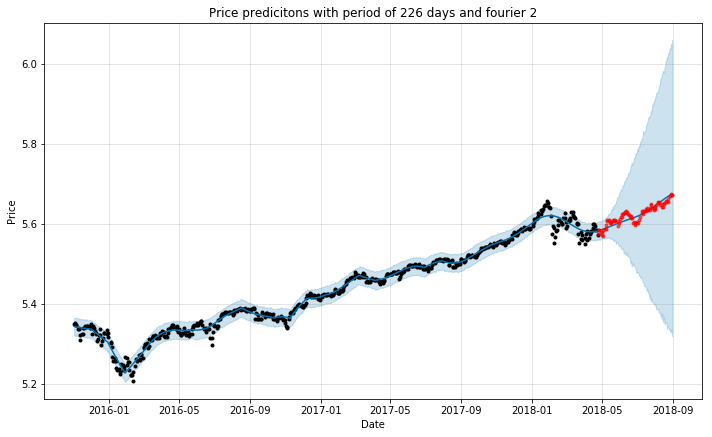

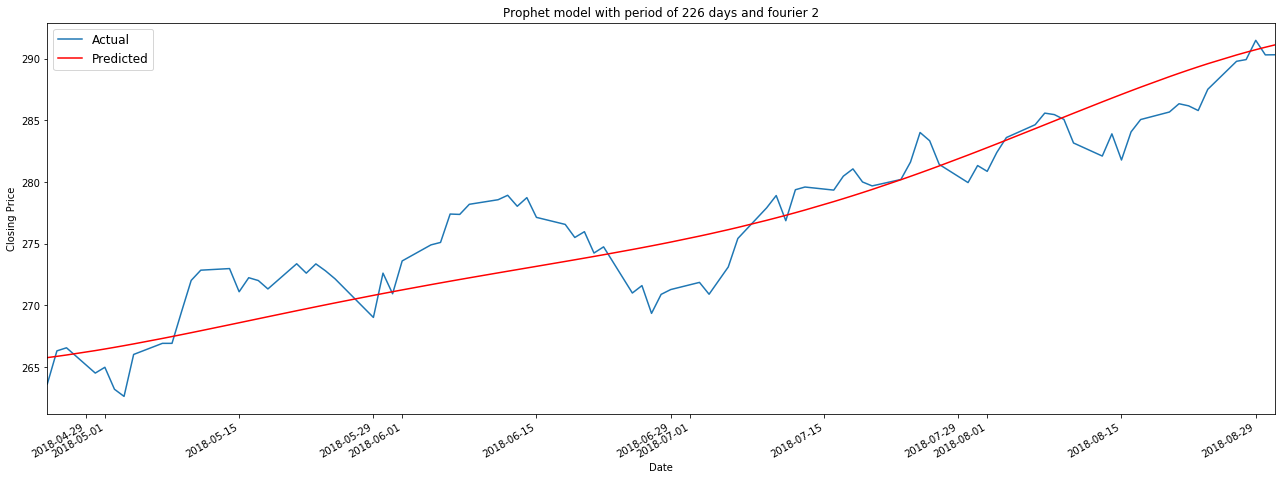

Actual Returns: 10.1202
Estimated Returns: 9.5366
Projected Sharpe: 23.2442
RMSE: 2.9271
MAPE: 0.8767


In [38]:
# perform grid search to evaluate optimal hyperparameters by minimizing RMSE
p_low, p_high = 225, 230 # 225 to 229
f_low, f_high = 1, 5 # 2 to 4 -- values over 5 appear to be overfitting the test set, causing RMSE to be higher
pred_per = 128 # 4/26/18 should be start of test period -- 91 trading days equivalent to 128 total days

ca_best = optimal_pf(log_data, pred_per, p_low, p_high, f_low, f_high)

### Fama-French Model

In [0]:
def load_fama_french(num_factors=5):
  # move outside so we only have to load data once
  ff_data = pdr.famafrench.get_available_datasets()[num_factors-1] # idx 2 for 3-factor, idx 4 for 5-factor
  ff_df = pdr.data.DataReader(ff_data, 'famafrench')[0]
  ff_df = ff_df/100
  ff_df = ff_df.rename(columns = {'Mkt-RF':'mkt'})
  #ff_df = ff_df.drop(['RF'], axis=1) # don't need risk-free rate for algorithm
  return ff_df

def fama_french_model(ff_data, stock="SPY", start_date='2015-10-31', end_date='2018-9-1', prediction_period=91, bias=1e-4):
  #print("--------Computing Predictions for {stock}--------".format(stock=stock))
  
  # load stock data from specified equity
  try: stock_data = load_stock(stock, start_date, end_date)['Close'] # push log difference to later
  except KeyError: print("* failed loading {} data *".format(stock))
  
  # combine data together
  df = pd.concat([ff_data, stock_data], axis=1).dropna()
  df['Close'] = np.log(df['Close']).diff()
  df.dropna(inplace=True)
  
  # split data into train/test sets
  train_set, test_set = df[:-prediction_period], df[-prediction_period:]
  # split data into x/y
  X_train, y_train = train_set.drop('Close', axis=1), train_set['Close']
  X_test, y_test = test_set.drop('Close', axis=1), test_set['Close']
  
  # fit model on training data
  model = lm.LinearRegression().fit(X_train, y_train)
  y_preds = model.predict(X_test) + bias # predict on test set, and add a small amount of bias to leverage predictions upward
  
  Y_true = reform_data(stock_data, df['Close'].values)[-prediction_period:]
  Y_pred = reform_data(stock_data, np.concatenate((y_train.values, y_preds)))[-prediction_period:]

  # plot our predictions versus actual values
  plt.figure(figsize=(22,8))
  plt.plot(Y_pred, color='red', label='Predictions')
  plt.plot(Y_true, alpha=0.8, label='Actual')
  plt.title("Returns for " + stock)
  plt.xlabel("Days from current date")
  plt.ylabel("Return (%)")
  plt.legend(fontsize='large')
  plt.show()
  
  stats = performance_stats(Y_true, Y_pred)
  
  for key, value in stats.items():
    print("{}: {:.4f}".format(key, value))
  
  return stats # [predicted_ret, actual_ret]

In [0]:
# load fama french data
ff3_data, ff5_data = load_fama_french(3), load_fama_french(5)

#### Fama-French 3-Factor Model

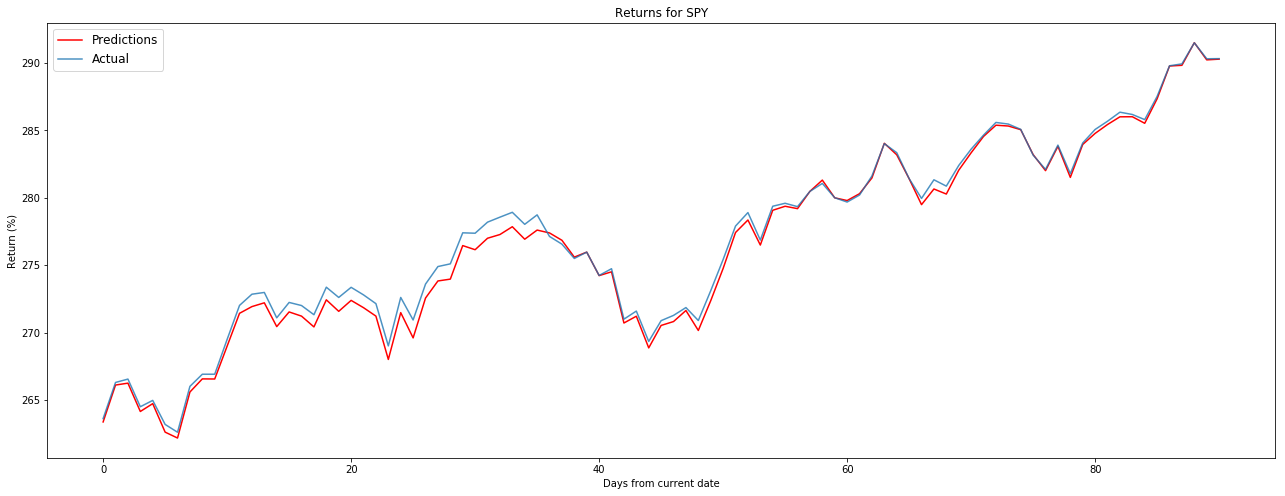

Actual Returns: 10.1202
Estimated Returns: 10.2085
Projected Sharpe: 3.0870
RMSE: 0.5957
MAPE: 0.1679


In [41]:
ff3_model = fama_french_model(ff3_data, bias=1.4e-4)

#### Fama-French 5-Factor Model

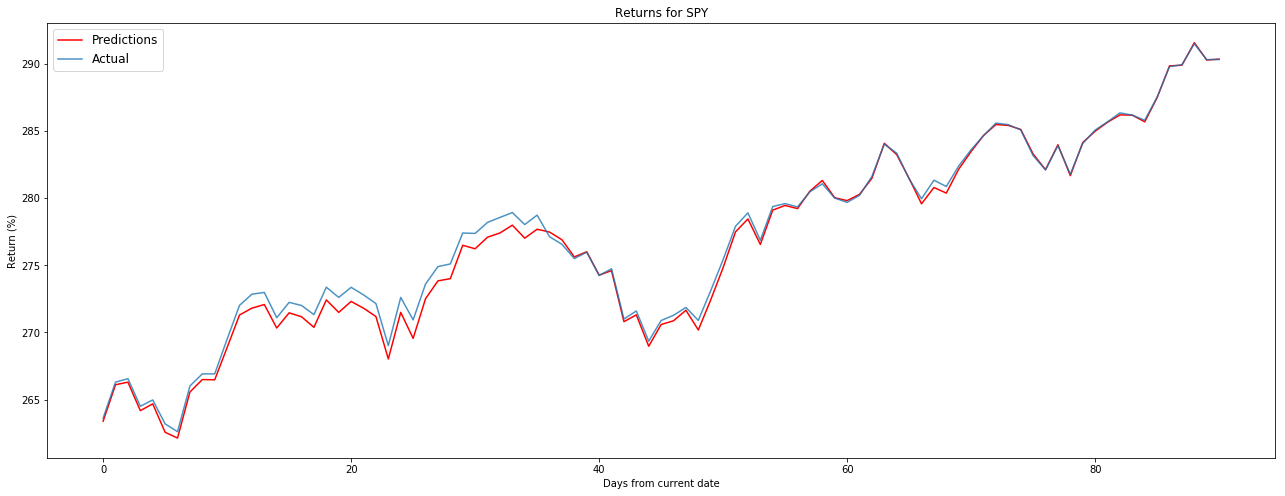

Actual Returns: 10.1202
Estimated Returns: 10.2272
Projected Sharpe: 3.0912
RMSE: 0.5868
MAPE: 0.1597


In [42]:
ff5_model = fama_french_model(ff5_data, bias=1.3e-4)

## Result Summary

All models were evaluated on their ability to forecast the price of the S&P 500 index for a 3-month period, ending on September 1, 2018. The index yielded actual returns of 10.120% over this period, which can be compared to the estimated returns column for each model in the table below, along with the other evaluation metrics we defined earlier.  

| Forecasting Model | Est. Returns | Est. Sharpe | RMSE | MAPE | 
|------------|---------------------|--------------------|-----------|------------| 
| Persistence | 10.389% | 3.216 | 1.520 | 0.446 |
| Random Walk | 10.389% | 3.250 | 1.485 | 0.434 |
| Auto-ARIMA | 
| Facebook Prophet | 9.537% | 23.244 | 2.927 | 0.877 |
| Fama-French 3-Factor | 10.209% | 3.087 | 0.596 | 0.168 |
| Fama-French 5-Factor | 10.227% | 3.091 | 0.587 | 0.160 |  

Based on these results, the Fama-French Factor models attain the highest performance, and successfully beat out the persistence model that served as our baseline method. Although the 3-Factor model is slightly more accurate in estimating overall returns for the period, the 5-Factor model effectively minimizes both RMSE and MAPE.  

However, we need to consider the fact that predictions are made on a diversified index meant to encapsulate the movement of the entire market; because these items are considered in creating factors for the Fama-French model, more extensive testing should be performed on a small basket of individual stocks, and model performance evaluated on the portfolio as a whole. This method of evaluation will be continued in future steps, and added back into the research as it completes.

## Future Work

1. Add economic variables (oil, gold, treasury yields, etc.)
2. Add news sentiment
3. Neural Network with Fama-French Factors
4. Recurrent Neural Network (LSTM)
5. Deep Reinforcement Learning
6. Ensemble algorithms
7. Individualize models by sector
8. Extend to entire market
9. Automate workflow to purchase stocks at month start

In [0]:
# "2017-1-1", "2019-2-28"
def performance_eval(fama_factors=5, universe_size=50, port_size=10, start=start, end=end, prediction_per=91):
  
  ff_data = load_fama_french(fama_factors)
  
  def get_returns(fama_factors, ff_data, universe_size, start, end, prediction_per):
    print("\nLoading S&P500 from wikipedia.")
    sp500 = save_sp500_tickers()
    np.random.shuffle(sp500) # shuffle stocks to get a good variety
    # GOOG/GOOGL are duplicates -- remove one with no voting rights
    sp500 = [symbol for symbol in sp500 if symbol not in {"GOOG", "BRK.B", "BF.B"}]
    print("Generating predictions with {}-factor model.".format(fama_factors))
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    stock_dict = {}
    print("Stock\t|| Predicted\t|| Actual\t|| MSE\t\t|| R2")
    print("==================================================================")
    # just look at the top 50 for now -- too much computation time
    for stock in sp500[:universe_size]:
      stock_dict[stock] = fama_french_model(ff_data=ff_data, stock=stock, start_date=start, end_date=end, prediction_period=prediction_per)
    return stock_dict
  
  stock_dict = get_returns(fama_factors, ff_data, universe_size, start, end, prediction_per)
    
  def find_top_returns(stocks, port_size, sort_by_preds=True):
    # stocks should be a dictionary, port_size is the number of stocks we want to keep in our portfolio
    if sort_by_preds: # sort by predicted value
      sorted_stocks = sorted(stocks.items(), key=lambda x: x[1], reverse=True)[:port_size]
    else: # sort by actual value
      sorted_stocks = sorted(stocks.items(), key=lambda x: x[1][1], reverse=True)[:port_size]
    return [x[0] for x in sorted_stocks]
  
  print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
  predictions = find_top_returns(stock_dict, port_size)
  actual = find_top_returns(stock_dict, port_size, False)
  print("\nHighest predicted returns:\n {predictions}".format(predictions=predictions))
  print("Highest actual returns:\n {actual}".format(actual=actual))
  
  good_buys = [stock for stock in predictions if stock in actual]
  bad_buys = [stock for stock in predictions if stock not in actual]
  misses = [stock for stock in actual if stock not in predictions]
  print("\nStocks we picked that were actually top performers:\n {good}".format(good=good_buys))
  print("Stocks we picked that were NOT top perfomers:\n {bad}".format(bad=bad_buys))
  print("Stocks we should have picked instead:\n {miss}".format(miss=misses))
  
  return predictions

In [0]:
# creates a 10-stock portfolio from 100 S&P500 symbols using FF5-factor model, based on 1-month predicted returns(%)
ff5_preds = performance_eval(universe_size=10)